In [1]:
import torch
import os
import numpy as np
from datasets.crowd import Crowd
from models.vgg import vgg19
import argparse
from PIL import Image
import cv2
import sys
sys.path.insert(0, '/home/pongpisit/CSRNet_keras/')
from SFANet_crowd_counting import seg_aspp2_dmp_vgg19


%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm as CM

datasets = Crowd(os.path.join('/home/pongpisit/CSRNet_keras/CSRNet-keras/wnet_playground/W-Net-Keras/data/UCF-QNRF_ECCV18/processed/', 'test'), 512, 8, is_gray=False, method='val')
dataloader = torch.utils.data.DataLoader(datasets, 1, shuffle=False,
                                         num_workers=8, pin_memory=False)
model = seg_aspp2_dmp_vgg19.Model()
device = torch.device('cuda')
model.to(device)
# model.load_state_dict(torch.load(os.path.join('./u_logs/0331-111426/', 'best_model.pth'), device))
model.load_state_dict(torch.load(os.path.join('./seg_logs/0327-172121/', 'best_model.pth'), device))
model.eval()

epoch_minus = []
preds = []
gts = []

for inputs, count, name in dataloader:
    inputs = inputs.to(device)
    assert inputs.size(0) == 1, 'the batch size should equal to 1'
    with torch.set_grad_enabled(False):
        outputs = model(inputs)
        temp_minu = count[0].item() - (torch.sum(outputs).item())
        preds.append(torch.sum(outputs).item())
        gts.append(count[0].item())
        print(name, temp_minu, count[0].item(), torch.sum(outputs).item())
        epoch_minus.append(temp_minu)

epoch_minus = np.array(epoch_minus)
mse = np.sqrt(np.mean(np.square(epoch_minus)))
mae = np.mean(np.abs(epoch_minus))
log_str = 'Final Test: mae {}, mse {}'.format(mae, mse)
print(log_str)

/home/pongpisit/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2589: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


('img_0001',) -317.546875 975 1292.546875
('img_0002',) 269.50390625 923 653.49609375
('img_0003',) -35.95343017578125 350 385.95343017578125
('img_0004',) -0.5587158203125 183 183.5587158203125
('img_0005',) -34.59141540527344 103 137.59141540527344
('img_0006',) -29.6104736328125 436 465.6104736328125
('img_0007',) -22.375564575195312 77 99.37556457519531
('img_0008',) -46.74665832519531 92 138.7466583251953
('img_0009',) -27.23974609375 237 264.23974609375
('img_0010',) -23.93450927734375 564 587.9345092773438
('img_0011',) -8.8145751953125 540 548.8145751953125
('img_0012',) 8.483489990234375 434 425.5165100097656
('img_0013',) -49.7735595703125 1528 1577.7735595703125
('img_0014',) -44.89019775390625 225 269.89019775390625
('img_0015',) -54.9979248046875 413 467.9979248046875
('img_0016',) 189.4803466796875 853 663.5196533203125
('img_0017',) 7.0670166015625 191 183.9329833984375
('img_0018',) -31.52783203125 141 172.52783203125
('img_0019',) -64.09613037109375 137 201.09613037109

('img_0153',) 129.1246337890625 641 511.8753662109375
('img_0154',) 34.9815673828125 354 319.0184326171875
('img_0155',) 72.50494384765625 845 772.4950561523438
('img_0156',) 158.655029296875 2073 1914.344970703125
('img_0157',) 112.1375732421875 470 357.8624267578125
('img_0158',) -14.03997802734375 247 261.03997802734375
('img_0159',) 72.76605224609375 469 396.23394775390625
('img_0160',) 383.19146728515625 1063 679.8085327148438
('img_0161',) -25.68316650390625 313 338.68316650390625
('img_0162',) -57.7581787109375 279 336.7581787109375
('img_0163',) -33.09619140625 372 405.09619140625
('img_0164',) 95.0625 1586 1490.9375
('img_0165',) -14.04254150390625 198 212.04254150390625
('img_0166',) 240.91162109375 2315 2074.08837890625
('img_0167',) 153.019287109375 4195 4041.980712890625
('img_0168',) -49.59620666503906 138 187.59620666503906
('img_0169',) -51.0096435546875 174 225.0096435546875
('img_0170',) -2.363616943359375 148 150.36361694335938
('img_0171',) -83.369384765625 608 691.

('img_0317',) -32.8035888671875 811 843.8035888671875
('img_0318',) -54.694580078125 1616 1670.694580078125
('img_0319',) -145.636474609375 922 1067.636474609375
('img_0320',) -66.875 2414 2480.875
('img_0321',) -302.832275390625 2471 2773.832275390625
('img_0322',) -12.0128173828125 1613 1625.0128173828125
('img_0323',) 5.486083984375 2033 2027.513916015625
('img_0324',) 100.9185791015625 650 549.0814208984375
('img_0325',) -705.1279296875 1659 2364.1279296875
('img_0326',) -11.214874267578125 165 176.21487426757812
('img_0327',) -515.87158203125 1408 1923.87158203125
('img_0328',) -28.98321533203125 426 454.98321533203125
('img_0329',) 358.853759765625 962 603.146240234375
('img_0330',) -90.558837890625 1668 1758.558837890625
('img_0331',) -406.628173828125 2607 3013.628173828125
('img_0332',) -77.387939453125 770 847.387939453125
('img_0333',) -164.37109375 601 765.37109375
('img_0334',) -227.2513427734375 1508 1735.2513427734375
Final Test: mae 95.1714485077087, mse 153.73158691480

In [2]:
met = []
for i in range(len(preds)):
    met.append(100 * np.abs(preds[i] - gts[i]) / gts[i])

idxs = []
for i in range(len(met)):
    idxs.append(np.argmin(met))
    if len(idxs) == 5: break
    met[np.argmin(met)] += 100000000
    
set(idxs)

{3, 47, 63, 65, 322}

In [5]:
def resize(density_map, image):
    density_map = 255*density_map/np.max(density_map)
    density_map= density_map[0][0]
    image= image[0]
    print(density_map.shape)
    result_img = np.zeros((density_map.shape[0]*2, density_map.shape[1]*2))
    for i in range(result_img.shape[0]):
        for j in range(result_img.shape[1]):
            result_img[i][j] = density_map[int(i / 2)][int(j / 2)] / 4
    result_img  = result_img.astype(np.uint8, copy=False)
    return result_img

def vis_densitymap(o, den, cc, img_path):
    fig=plt.figure()
    columns = 2
    rows = 1
#     X = np.transpose(o, (1, 2, 0))
    X = o
    summ = int(np.sum(den))
    
    den = resize(den, o)
    
    for i in range(1, columns*rows +1):
        # image plot
        if i == 1:
            img = X
            fig.add_subplot(rows, columns, i)
            plt.gca().set_axis_off()
            plt.margins(0,0)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
            plt.imshow(img)
            
        # Density plot
        if i == 2:
            img = den
            fig.add_subplot(rows, columns, i)
            plt.gca().set_axis_off()
            plt.margins(0,0)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
            plt.text(1, 80, 'M-SegNet* Est: '+str(summ)+', Gt:'+str(cc), fontsize=7, weight="bold", color = 'w')
            plt.imshow(img, cmap=CM.jet)
    
    filename = img_path.split('/')[-1]
    filename = filename.replace('.jpg', '_heatpmap.png')
    print('Save at', filename)
    plt.savefig('seg_'+filename, transparent=True, bbox_inches='tight', pad_inches=0.0, dpi=200)

/home/pongpisit/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2589: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


Do VIS
(1024, 1544)
Save at img_0004_heatpmap.png
Do VIS
(1024, 1536)
Save at img_0048_heatpmap.png
Do VIS
(1024, 1368)
Save at img_0064_heatpmap.png
Do VIS
(832, 1248)
Save at img_0066_heatpmap.png
Do VIS
(1024, 1536)
Save at img_0323_heatpmap.png


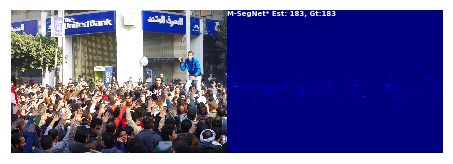

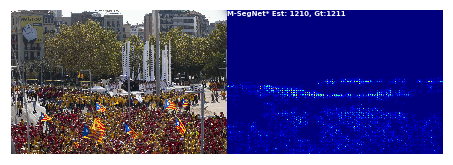

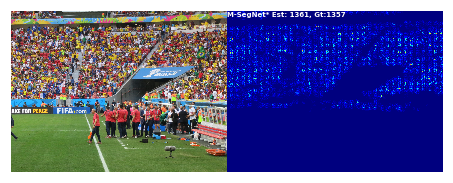

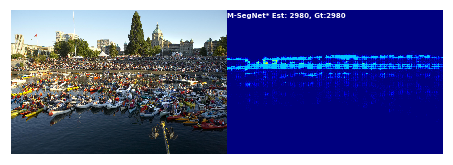

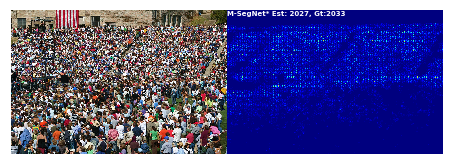

In [6]:
processed_dir = '/home/pongpisit/CSRNet_keras/CSRNet-keras/wnet_playground/W-Net-Keras/data/UCF-QNRF_ECCV18/processed/test/'
model.eval()
c = 0

for inputs, count, name in dataloader:
    img_path = os.path.join(processed_dir, name[0]) + '.jpg'
    if c in set(idxs):
        inputs = inputs.to(device)
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            
            img = Image.open(img_path).convert('RGB')
            height, width = img.size[1], img.size[0]
            height = round(height / 16) * 16
            width = round(width / 16) * 16
            img = cv2.resize(np.array(img), (width,height), cv2.INTER_CUBIC)
            
            print('Do VIS')
            vis_densitymap(img, outputs.cpu().detach().numpy(), int(count.item()), img_path)
            c += 1
            
    else:
        c += 1